## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [25]:
!pip install sklearn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 11.0MB 118kB/s eta 0:00:01


In [51]:
%matplotlib inline

In [52]:
import numpy as np

In [53]:
random_data = np.random.random((20, 2))

random_data

In [54]:
import matplotlib.pyplot as plt

In [60]:
X = random_data[:, 0]

In [61]:
y = random_data[:, 1]

In [62]:
y

array([0.52619691, 0.45411523, 0.49032669, 0.06828408, 0.72578183,
       0.45794579, 0.58920022, 0.40902253, 0.98643563, 0.74573986,
       0.30265318, 0.15176903, 0.27721706, 0.62998253, 0.08267824,
       0.28925074, 0.86111224, 0.08290958, 0.31936838, 0.30323034])

In [63]:
X

array([0.09260585, 0.87987019, 0.3461554 , 0.19884436, 0.66154601,
       0.50901261, 0.03622195, 0.90977464, 0.4120157 , 0.38990702,
       0.07209075, 0.13706614, 0.54245347, 0.27548141, 0.89501426,
       0.79212703, 0.0823391 , 0.64782732, 0.35417003, 0.58841281])

In [64]:
import numpy as np

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
reg = LinearRegression().fit(X.reshape(-1, 1), y)

In [67]:
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
X

array([0.09260585, 0.87987019, 0.3461554 , 0.19884436, 0.66154601,
       0.50901261, 0.03622195, 0.90977464, 0.4120157 , 0.38990702,
       0.07209075, 0.13706614, 0.54245347, 0.27548141, 0.89501426,
       0.79212703, 0.0823391 , 0.64782732, 0.35417003, 0.58841281])

In [69]:
X.reshape(-1, 1)

array([[0.09260585],
       [0.87987019],
       [0.3461554 ],
       [0.19884436],
       [0.66154601],
       [0.50901261],
       [0.03622195],
       [0.90977464],
       [0.4120157 ],
       [0.38990702],
       [0.07209075],
       [0.13706614],
       [0.54245347],
       [0.27548141],
       [0.89501426],
       [0.79212703],
       [0.0823391 ],
       [0.64782732],
       [0.35417003],
       [0.58841281]])

In [70]:
reg.score(X.reshape(-1, 1), y)

0.05505989256379673

In [71]:
y

array([0.52619691, 0.45411523, 0.49032669, 0.06828408, 0.72578183,
       0.45794579, 0.58920022, 0.40902253, 0.98643563, 0.74573986,
       0.30265318, 0.15176903, 0.27721706, 0.62998253, 0.08267824,
       0.28925074, 0.86111224, 0.08290958, 0.31936838, 0.30323034])

In [72]:
type(reg)

sklearn.linear_model.base.LinearRegression

In [73]:
reg.coef_

array([-0.21019959])

In [74]:
reg.intercept_

0.5303898821766584

In [75]:
def f(x):
    return reg.coef_ * x + reg.intercept_

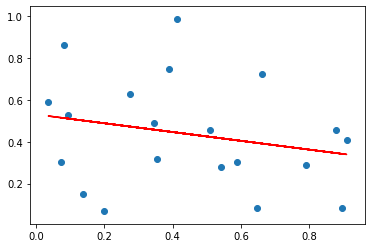

In [76]:
plt.scatter(X, y)
plt.plot(X, f(X), color = 'red')

In [54]:
def model(X, y):
    # 直接存储X,y即可
    return [(Xi, yi) for Xi, yi in zip(X, y)]

In [51]:
from scipy.spatial.distance import cosine

In [68]:
def distance(x1, x2):
    return cosine(x1, x2)

In [65]:
def predict(x, k=5):
    # 在predict的时候，需要做大量的计算
    most_similars = sorted(model(X, y), key=lambda xi: distance(xi[0], x))[:k]
    
    y_hats = [_y for x, _y in most_similars]
    
    print("most_similars", most_similars)
    
    print("y_hats", y_hats)
    
    return np.mean(y_hats)
# -> regression: numerical -> most_similars(y)
# -> classification: categorical -> most_similar (y)

# 已经获得了最相似的数据集
# 然后呢，Counter() -> most_common() -> 就可以获得出现最多的这个y了

In [53]:
X, y

(array([0.59465282, 0.99103924, 0.94788221, 0.47868857, 0.6190507 ,
        0.80425047, 0.87651885, 0.97205672, 0.05989759, 0.99019775,
        0.0185682 , 0.75025824, 0.42390673, 0.84580356, 0.16108818,
        0.57485969, 0.33543376, 0.37234642, 0.84253403, 0.55325973]),
 array([17.96834777, 16.27992584, 14.70162161, 11.4144269 , 11.29527934,
        10.77695633, 14.74535256, 15.02556009,  2.80262769, 13.26864988,
         0.24881384, 10.05346036,  6.68035018, 19.33376766,  9.15858165,
        11.70311988,  6.49481235,  9.98944203, 13.28995605,  8.41368038]))

In [56]:
myself_knn = model(X, y)

In [57]:
myself_knn

[(0.5946528185601869, 17.968347768706504),
 (0.9910392419681112, 16.27992584237269),
 (0.9478822096717707, 14.70162160960173),
 (0.47868857449599567, 11.414426898246342),
 (0.6190506969427724, 11.29527933903315),
 (0.8042504727317771, 10.776956334605813),
 (0.8765188474298964, 14.745352555560611),
 (0.9720567233313673, 15.025560092640323),
 (0.05989758897981412, 2.8026276923295095),
 (0.990197752073304, 13.268649877782273),
 (0.018568197321467528, 0.24881384410766483),
 (0.7502582361277619, 10.05346036411201),
 (0.42390673011944013, 6.680350183600499),
 (0.8458035566622677, 19.333767659274386),
 (0.16108818315359952, 9.158581654258233),
 (0.5748596921831854, 11.703119875254686),
 (0.33543375780728546, 6.4948123546176255),
 (0.3723464199820531, 9.989442027759512),
 (0.8425340335104387, 13.28995604903988),
 (0.5532597300497378, 8.413680382666488)]

In [69]:
predict(0.9)

most_similars [(0.5946528185601869, 17.968347768706504), (0.8425340335104387, 13.28995604903988), (0.9910392419681112, 16.27992584237269), (0.6190506969427724, 11.29527933903315), (0.8042504727317771, 10.776956334605813)]
y_hats [17.968347768706504, 13.28995604903988, 16.27992584237269, 11.29527933903315, 10.776956334605813]


13.922093066751609

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [78]:
def model(X, y):
    # 直接存储X,y即可
    return [(Xi, yi) for Xi, yi in zip(X, y)]

In [79]:
from scipy.spatial.distance import cosine

In [80]:
def distance(x1, x2):
    return cosine(x1, x2)

In [81]:
def predict(x, k=5):
    # 在predict的时候，需要做大量的计算
    most_similars = sorted(model(X, y), key=lambda xi: distance(xi[0], x))[:k]
    
    y_hats = [_y for x, _y in most_similars]
    
    print("most_similars", most_similars)
    
    print("y_hats", y_hats)
    
    return np.mean(y_hats)
# -> regression: numerical -> most_similars(y)
# -> classification: categorical -> most_similar (y)

# 已经获得了最相似的数据集
# 然后呢，Counter() -> most_common() -> 就可以获得出现最多的这个y了

In [82]:
X, y

(array([0.09260585, 0.87987019, 0.3461554 , 0.19884436, 0.66154601,
        0.50901261, 0.03622195, 0.90977464, 0.4120157 , 0.38990702,
        0.07209075, 0.13706614, 0.54245347, 0.27548141, 0.89501426,
        0.79212703, 0.0823391 , 0.64782732, 0.35417003, 0.58841281]),
 array([0.52619691, 0.45411523, 0.49032669, 0.06828408, 0.72578183,
        0.45794579, 0.58920022, 0.40902253, 0.98643563, 0.74573986,
        0.30265318, 0.15176903, 0.27721706, 0.62998253, 0.08267824,
        0.28925074, 0.86111224, 0.08290958, 0.31936838, 0.30323034]))

In [83]:
myself_knn = model(X, y)

In [84]:
myself_knn

[(0.09260585224660478, 0.5261969146396398),
 (0.8798701908638658, 0.45411523399135745),
 (0.34615539757700964, 0.4903266918258711),
 (0.19884435683979906, 0.06828408415191178),
 (0.6615460065799738, 0.7257818264839189),
 (0.5090126136618282, 0.4579457896203202),
 (0.03622194861154904, 0.5892002159487495),
 (0.9097746357492839, 0.4090225250821288),
 (0.412015704811307, 0.9864356321118465),
 (0.3899070217184064, 0.7457398570685915),
 (0.0720907527849749, 0.3026531764399957),
 (0.13706614289823893, 0.1517690347942312),
 (0.5424534690484876, 0.2772170577101679),
 (0.27548140915671615, 0.6299825324442834),
 (0.8950142558038954, 0.082678243218402),
 (0.7921270272774245, 0.28925074232068726),
 (0.08233909924025062, 0.861112241742074),
 (0.6478273153222663, 0.08290958172409313),
 (0.35417003243540013, 0.3193683767000354),
 (0.5884128108206848, 0.3032303424239944)]

In [85]:
predict(0.9)

most_similars [(0.5090126136618282, 0.4579457896203202), (0.03622194861154904, 0.5892002159487495), (0.7921270272774245, 0.28925074232068726), (0.09260585224660478, 0.5261969146396398), (0.8798701908638658, 0.45411523399135745)]
y_hats [0.4579457896203202, 0.5892002159487495, 0.28925074232068726, 0.5261969146396398, 0.45411523399135745]


0.46334177930415077

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [88]:
import pandas as pd

from icecream import ic

from collections import Counter

from collections import defaultdict

In [187]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
   # 'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [175]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'F', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
   # 'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 1, 0],
}

In [188]:
dataset = pd.DataFrame.from_dict(mock_data)

In [189]:
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [179]:
find_the_optimal_spilter1(dataset, 'bought')

ic| f: 'income'
ic| values: {'+10', '-10'}
ic| sub_spliter_1: [1, 1, 0, 0, 1]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 0]
ic| entropy_2: 0.6931471805599453
ic| entropy_v: 1.366158847569202
ic| sub_spliter_1: [1, 0]
ic| entropy_1: 0.6931471805599453
ic| sub_spliter_2: [1, 1, 0, 0, 1]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 1.366158847569202
ic| f: 'gender'
ic| values: {'M', 'F'}
ic| sub_spliter_1: [1, 0]
ic| entropy_1: 0.6931471805599453
ic| sub_spliter_2: [1, 1, 1, 0, 0]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 1.366158847569202
ic| sub_spliter_1: [1, 1, 1, 0, 0]
ic| 

{'income', 'gender', 'family_number'}


entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 0]
ic| entropy_2: 0.6931471805599453
ic| entropy_v: 1.366158847569202
ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_spliter_1: [1, 1, 0, 0, 1]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 0]
ic| entropy_2: 0.6931471805599453
ic| entropy_v: 1.366158847569202
ic| sub_spliter_1: [1, 0]
ic| entropy_1: 0.6931471805599453
ic| sub_spliter_2: [1, 1, 0, 0, 1]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 1.366158847569202


spliter is: ('family_number', 1, 1.366158847569202)
the min entropy is: 1.366158847569202


('family_number', 1, 1.366158847569202)

In [98]:
dataset[1:2]

,gender,income,family_number,bought
1,F,-10,1,1


In [100]:
pd.DataFrame()

""


In [111]:
splited_data = dataset[dataset['family_number'] == 1]
splited_data

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [ ]:
entropy([0, 0, 0, 0, 0])

In [ ]:
# you code here
import numpy as np
from icecream import ic
from collections import Counter

In [197]:
#信息熵
def entropy(elements):
    counter = Counter(elements)
    #计算每个set的概率
    probs = [counter[c] / len(elements) for c in set(elements)]
    return - sum(p * np.log(p) for p in probs)

#找到信息熵最小的列
def find_the_optimal_spilter(training_data: pd.DataFrame, target: str) -> str:
    x_fields = set(training_data.columns.tolist()) - {target}
    # pdb.set_trace()
    spliter = None
    min_entropy = float('inf')
    
    for f in x_fields:
        ic(f)
        values = set(training_data[f])
        ic(values)
        for v in values:
            sub_spliter_1 = training_data[training_data[f] == v][target].tolist()
            #ic(sub_spliter_1)

            entropy_1 = entropy(sub_spliter_1)
            #ic(entropy_1)
            
            sub_spliter_2 = training_data[training_data[f] != v][target].tolist()
            #ic(sub_spliter_2)
            
            entropy_2 = entropy(sub_spliter_2)
            #ic(entropy_2)
            
            entropy_v = entropy_1 + entropy_2
            #ic(entropy_v)
            # entropy_1 = 0控制有无纯的数据，如果没有，则无需分割(决策树终止条件)
            # entropy_1 <= entropy_2来控制getDecisionTree分割entropy不为0的数据，即更不纯的数据
            if entropy_v <= min_entropy and entropy_1 <= entropy_2:
                min_entropy = entropy_v
                spliter = (f, v , entropy_1, entropy_2)
    
    #print('spliter is: {}'.format(spliter))
    #print('the min entropy is: {}'.format(min_entropy))
    return spliter
import pdb

def getDecisionTree(training_data: pd.DataFrame, target: str, printprocess = True):
    # pdb.set_trace()
    decisionTree = {}
    while True:
        
        #查找
        (key, value, entropy1, entropy2) = find_the_optimal_spilter(training_data=training_data, target=target)
        decisionTree[key] = value
        # 信息熵为0直接返回，找到最优解
        if (entropy1 + entropy2 == 0):
            break
        # 两组数据的entropy都不为0，则没有纯的数据，决策树停止
        if (min(entropy1, entropy2) != 0):
            break
        # 获取新的dataset
        training_data = training_data[training_data[key] != value]
        # 移除已经计算的列
        training_data = training_data.drop([key],axis=1)

        # 如果已经没有可以移除的列，则跳出(此处判断需要排除target列))
        if len(training_data.columns) == 1:
            print('training_data.columns:', training_data.columns)
            break
        # 如果没有可用数据跳出循环
        if training_data.shape[0] == 0:
            print('training_data.shape:', training_data.shape)
            break
    # 是否打印决策过程         
    if printprocess:
        i = 0
        for k,v in decisionTree.items():
            i += 1
            print('第{0}次使用列 "{1}" = {2} 进行分割。'.format(i,k,v))
    return decisionTree

In [182]:
ex_family_dataset = dataset[dataset['family_number']==1].drop('family_number', axis=1)
ex

,gender,income,bought
0,F,+10,1
1,F,-10,1
3,F,+10,0
4,F,+10,0
5,M,+10,1


In [ ]:
getDecisionTree(training_data=ex_family_dataset, target='bought')

In [194]:
getDecisionTree(training_data=dataset, target='bought')

ic| f: 'income'
ic| values: {'+10', '-10'}
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| f: 'gender'
ic| values: {'M', 'F'}
ic| sub_spliter_1: [0, 0, 1]
ic| entropy_1: 0.6365141682948128
ic| sub_spliter_2: [1, 1, 1, 0]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| sub_spliter_1: [1, 1, 1, 0]
ic| entropy_1: 0.5623351446188083
ic| sub_spliter_2: [0, 0, 1]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_spliter_1: [1, 1, 0, 0, 0]
ic| entropy_1: 0.6730116670092565
ic| sub_spliter_2: [1, 1]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| sub_spliter_1: [1, 1]
ic| entropy_1: -0.0
ic| sub_spliter_2: [1, 1, 0, 0, 0]
ic| entropy_2: 0.6730116

training_data.columns: Index(['bought'], dtype='object')
第1次使用列 "family_number" = 2 进行分割。
第2次使用列 "income" = -10 进行分割。
第3次使用列 "gender" = M 进行分割。


{'family_number': 2, 'income': '-10', 'gender': 'M'}

In [157]:
mock_data_gender = {
    'gender':['F', 'F', 'M', 'M'],
    'bought': [1, 0, 0, 1],
}
dataset_gender = pd.DataFrame.from_dict(mock_data_gender)
dataset_gender

,gender,bought
0,F,1
1,F,0
2,M,0
3,M,1


In [161]:
find_the_optimal_spilter1(dataset_gender, 'bought')

ic| f: 'gender'
ic| values: {'M', 'F'}
ic| sub_spliter_1: [0, 1]
ic| entropy_1: 0.6931471805599453
ic| sub_spliter_2: [1, 0]
ic| entropy_2: 0.6931471805599453
ic| entropy_v: 1.3862943611198906
ic| sub_spliter_1: [1, 0]
ic| entropy_1: 0.6931471805599453
ic| sub_spliter_2: [0, 1]
ic| entropy_2: 0.6931471805599453
ic| entropy_v: 1.3862943611198906


{'gender'}
spliter is: ('gender', 'F', 1.3862943611198906)
the min entropy is: 1.3862943611198906


('gender', 'F', 1.3862943611198906)

In [145]:
getDecisionTree(training_data=dataset_gender, target='bought')

> <ipython-input-140-4db10fb9e79c>(51)getDecisionTree()
-> decisionTree = {}
(Pdb) c
> <ipython-input-140-4db10fb9e79c>(17)find_the_optimal_spilter()
-> spliter = None
(Pdb) c
第1次使用列 "gender" = M 进行分割。


{'gender': 'M'}

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [110]:
from sklearn.cluster import KMeans

In [111]:
X1 = [random.randint(0, 100) for _ in range(100)]
X2 = [random.randint(0, 100) for _ in range(100)]

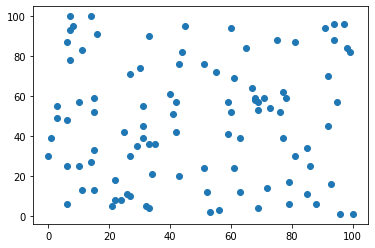

In [120]:
plt.scatter(X1, X2)

In [121]:
training_data = [[x1, x2] for x1, x2 in zip(X1, X2)]

In [122]:
cluster = KMeans(n_clusters=6, max_iter=500)

In [123]:
cluster.fit(training_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [124]:
cluster.cluster_centers_

array([[74.94444444, 13.44444444],
       [69.4       , 56.2       ],
       [21.28571429, 86.78571429],
       [86.        , 87.54545455],
       [20.72222222, 15.5       ],
       [23.57894737, 46.89473684]])

In [125]:
cluster.labels_

array([5, 1, 4, 1, 2, 2, 3, 1, 0, 3, 0, 5, 1, 0, 4, 1, 2, 5, 5, 4, 4, 5,
       2, 5, 0, 1, 5, 5, 4, 5, 2, 5, 0, 3, 4, 3, 2, 0, 5, 4, 4, 3, 0, 1,
       0, 5, 2, 0, 2, 5, 2, 4, 1, 5, 0, 3, 4, 0, 5, 0, 5, 4, 4, 2, 5, 1,
       0, 1, 3, 3, 1, 2, 1, 5, 1, 2, 0, 3, 2, 5, 1, 0, 4, 0, 2, 1, 4, 1,
       1, 4, 4, 3, 4, 1, 4, 0, 0, 1, 3, 1], dtype=int32)

In [126]:
from collections import defaultdict

In [127]:
centers = defaultdict(list)

In [129]:
for label, location in zip(cluster.labels_, training_data):
    centers[label].append(location)

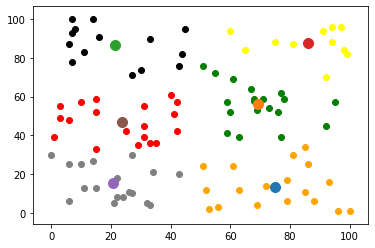

In [131]:
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i])
        
for center in cluster.cluster_centers_:
     plt.scatter(*center, s=100)

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans:
### Model:
The model is the mathematical model used to describe the objective world, and the model is abstracted from the data. In data analysis, we usually have only data on hand, and then look at the data to find the law, the rule is the model.Just like when I was a kid in a number game,1,4,16,...()...256. What's in parentheses? Only by abstracting the strings into models can we know what is in parentheses. In fact, when we were very young to contact with machine learning, but at that time only the examination, without these in-depth thinking.

### Reason:
Every model involves many features, we need to choose different features in specific case

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans:
### Underfitting:
Underfitting refers to a model that can neither model the training data nor generalize to new data.

An underfit machine learning model is not a suitable model and will be obvious as it will have poor performance on the training data.

Underfitting is often not discussed as it is easy to detect given a good performance metric. The remedy is to move on and try alternate machine learning algorithms. Nevertheless, it does provide a good contrast to the problem of overfitting.

### Overfitting:
Overfitting refers to a model that models the training data too well.
For example, decision trees are a nonparametric machine learning algorithm that is very flexible and is subject to overfitting training data. This problem can be addressed by pruning a tree after it has learned in order to remove some of the detail it has picked up.

### The reasons that make model overfitting:
1. Model complexity is high
2. little training data
3. Small training error
4. large test error
### The reasons that make model underfitting:
1. Model complexity is low 
2. can't fit all the data well 
3. High training error 

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:
### Precision：
all say 'yes' and correct / all say yes
precision = true positive / true positive + false positive
#### Target:
How many people with positive pneumonia actually get pneumonia 
### Recall:
all say 'yes' and correct / all truely yes
recall = true positive / true positive + false negative
#### Target:
How many people were tested for true pneumonia 
### AUC:
#### Roc：
A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

The X axis is False Positive Rate, while the y axis is True Positive Rate.The data in the Roc curve indicates the model effect as the classification threshold varies.When the classifier(predictive model) is the model random guessing, the Roc is a linear line(from (0,0) to (1,1))

#### Auc:
Area under the curve, the larger the Auc is, the better the model is.To be specific:

AUC =1, is the perfect classifier, when adopting this prediction model, there is at least one threshold to get the perfect prediction. most predictive occasions, there is no perfect classifier. 

0.5< AUC <1, better than random guesses. This classifier (model) can have predictive value if it sets the threshold properly. 

AUC =0.5, as with random guesses (example: copper throw), the model has no predictive value. 

AUC <0.5, worse than random guesses; but better than random guesses as long as they are always counter-predicted. 

#### Target:
The standard of messuring the model

### F1 score:
 $F_1 score =  \frac{2*precision*recall}{precision + recall} $
#### Target:
In that Precision and Recall always trade off, we use F1 to balance them(comprehensive consideration)

### F2 score:
$F_{\beta}$ $score = $ $(1+{\beta}^{2})$ $\frac{precision * recall}{({\beta})^{2}precision + recall}$¶
#### Target:
if beta = 1 precision and recall is equal, actually like F1 score
if beta > 1 recall is more important
if beta < 1 precision is more important
To conclude that, F2 score can justify the weight of precision and recall in the model

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans:
Machine learning：
As Arhur Samuel's definition, "Field of study that gives computers the ability to learn without being explicitly programmed".

In my humble opinion, Machine Learning is a way of thinking that the model is constantly optimized through the observed data.

To be exac, it is also a type of Artificial Intelligence that enables the programmers to write programs in a more simple way. It focuses more on developing programs that teach computers to change when exposed to new data and to grow. Its goal is to understand and follow the methods by using algorithms to do that task automatically without any human assistance.

In terms of traditional programming, developers should write a huge number of 'if-else' logic codes.If the demmands are changed, they should rewrite, whose cost is enormous.

Nevertheless, machine learning is a thinking way that is 'data driven', meaning we programmers do not need change logic codes again and again, we can just update the data.

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

I agree with the idea to some extent.The standard of the ML model is significant.However, the training data is more crucial.

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [211]:
tree = getDecisionTree(dataset, 'bought')
print(decisionTree)

ic| f: 'income'
ic| values: {'+10', '-10'}
ic| f: 'gender'
ic| values: {'M', 'F'}
ic| f: 'family_number'
ic| values: {1, 2}
ic| f: 'income'
ic| values: {'+10', '-10'}
ic| f: 'gender'
ic| values: {'M', 'F'}
ic| f: 'gender'
ic| values: {'M', 'F'}


training_data.columns: Index(['bought'], dtype='object')
第1次使用列 "family_number" = 2 进行分割。
第2次使用列 "income" = -10 进行分割。
第3次使用列 "gender" = M 进行分割。
{'family_number': 2, 'income': '-10', 'gender': 'M'}


In [219]:
def predicate(gender, income, family_number, tree = getDecisionTree(dataset, 'bought')):
    user = {}
    user['gender'] = gender
    user['income'] = income
    user['family_number'] = family_number
    for k, v in tree.items():
        print('k:', k)
        print('v:', v)
        if (v == user[k]):
            return 1
        break
    return 0
        
            

ic| f: 'income'
ic| values: {'+10', '-10'}
ic| f: 'gender'
ic| values: {'M', 'F'}
ic| f: 'family_number'
ic| values: {1, 2}
ic| f: 'income'
ic| values: {'+10', '-10'}
ic| f: 'gender'
ic| values: {'M', 'F'}
ic| f: 'gender'
ic| values: {'M', 'F'}


training_data.columns: Index(['bought'], dtype='object')
第1次使用列 "family_number" = 2 进行分割。
第2次使用列 "income" = -10 进行分割。
第3次使用列 "gender" = M 进行分割。


In [221]:
predicate('F', '+10', 1)

k: family_number
v: 2


0

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

In [29]:
from sklearn.datasets import load_boston
import random
import numpy as np
import matplotlib.pyplot as plt

dataset = load_boston() #加载数据集

x,y = dataset['data'],dataset['target']

X_rm = x[:,5]

In [32]:
def price(rm, k, b):
    return k*rm + b
def loss(y, y_hat):
    return sum(np.abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat)))/len(list(y))

In [43]:
# define partial derivative
def partial_derivative_k(x, y, y_hat):
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_i > y_hat_i:
            partial_k = -x_i
        if y_i == y_hat_i:
            partial_k = 0
        if y_i < y_hat_i:
            partial_k = x_i
        gradient +=  partial_k
    return 1 / n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        if y_i > y_hat_i:
            partial_b = -1
        if y_i == y_hat_i:
            partial_b = 0
        if y_i < y_hat_i:
            partial_b = 1
        gradient += partial_b
    return 1 / n * gradient

In [ ]:
y

In [52]:
#initialized parameters

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-2

iteration_num = 2000
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 254.0545283041111, parameters k is 47.48226321203717 and b is -21.82132954343541
Iteration 1, the loss is 253.64956201028397, parameters k is 47.41941686816365 and b is -21.831329543435412
Iteration 2, the loss is 253.24459571645752, parameters k is 47.356570524290134 and b is -21.841329543435414
Iteration 3, the loss is 252.83962942263062, parameters k is 47.29372418041662 and b is -21.851329543435416
Iteration 4, the loss is 252.43466312880355, parameters k is 47.2308778365431 and b is -21.861329543435417
Iteration 5, the loss is 252.0296968349767, parameters k is 47.168031492669584 and b is -21.87132954343542
Iteration 6, the loss is 251.62473054114994, parameters k is 47.10518514879607 and b is -21.88132954343542
Iteration 7, the loss is 251.21976424732296, parameters k is 47.04233880492255 and b is -21.891329543435422
Iteration 8, the loss is 250.8147979534963, parameters k is 46.979492461049034 and b is -21.901329543435423
Iteration 9, the loss is 250.409

Iteration 170, the loss is 185.21025835354848, parameters k is 36.798384753539324 and b is -23.521329543435677
Iteration 171, the loss is 184.80529205972147, parameters k is 36.73553840966581 and b is -23.531329543435678
Iteration 172, the loss is 184.40032576589465, parameters k is 36.67269206579229 and b is -23.54132954343568
Iteration 173, the loss is 183.99535947206772, parameters k is 36.609845721918774 and b is -23.55132954343568
Iteration 174, the loss is 183.59039317824096, parameters k is 36.54699937804526 and b is -23.561329543435683
Iteration 175, the loss is 183.18542688441403, parameters k is 36.48415303417174 and b is -23.571329543435684
Iteration 176, the loss is 182.7804605905875, parameters k is 36.42130669029822 and b is -23.581329543435686
Iteration 177, the loss is 182.3754942967604, parameters k is 36.35846034642471 and b is -23.591329543435688
Iteration 178, the loss is 181.97052800293343, parameters k is 36.29561400255119 and b is -23.60132954343569
Iteration 179

Iteration 328, the loss is 121.22558392890765, parameters k is 26.86866242152368 and b is -25.101329543435924
Iteration 329, the loss is 120.82061763508084, parameters k is 26.805816077650164 and b is -25.111329543435925
Iteration 330, the loss is 120.41565134125393, parameters k is 26.742969733776647 and b is -25.121329543435927
Iteration 331, the loss is 120.01068504742713, parameters k is 26.68012338990313 and b is -25.13132954343593
Iteration 332, the loss is 119.60571875360027, parameters k is 26.617277046029614 and b is -25.14132954343593
Iteration 333, the loss is 119.20075245977353, parameters k is 26.554430702156097 and b is -25.15132954343593
Iteration 334, the loss is 118.79578616594647, parameters k is 26.49158435828258 and b is -25.161329543435933
Iteration 335, the loss is 118.39081987211965, parameters k is 26.428738014409063 and b is -25.171329543435935
Iteration 336, the loss is 117.98585357829299, parameters k is 26.365891670535547 and b is -25.181329543435936
Iterati

Iteration 496, the loss is 53.191246565998604, parameters k is 16.31047665077287 and b is -26.781329543436186
Iteration 497, the loss is 52.786280272171744, parameters k is 16.247630306899353 and b is -26.791329543436188
Iteration 498, the loss is 52.381313978344906, parameters k is 16.184783963025836 and b is -26.80132954343619
Iteration 499, the loss is 51.976347684518025, parameters k is 16.12193761915232 and b is -26.81132954343619
Iteration 500, the loss is 51.57138139069119, parameters k is 16.059091275278803 and b is -26.821329543436192
Iteration 501, the loss is 51.16641509686444, parameters k is 15.996244931405284 and b is -26.831329543436194
Iteration 502, the loss is 50.76144880303758, parameters k is 15.933398587531766 and b is -26.841329543436196
Iteration 503, the loss is 50.356482509210686, parameters k is 15.870552243658247 and b is -26.851329543436197
Iteration 504, the loss is 49.95151621538381, parameters k is 15.807705899784729 and b is -26.8613295434362
Iteration 5

Iteration 667, the loss is 4.526762693166191, parameters k is 8.096177698203679 and b is -28.09496590707252
Iteration 668, the loss is 4.52654028906346, parameters k is 8.094719338519884 and b is -28.095361163989516
Iteration 669, the loss is 4.5263814970748, parameters k is 8.093510465002097 and b is -28.095716895214814
Iteration 670, the loss is 4.526227891657209, parameters k is 8.092301591484311 and b is -28.09607262644011
Iteration 671, the loss is 4.526127173085399, parameters k is 8.09134912112858 and b is -28.09638883197371
Iteration 672, the loss is 4.5260264545136035, parameters k is 8.090396650772849 and b is -28.096705037507306
Iteration 673, the loss is 4.525925735941796, parameters k is 8.089444180417118 and b is -28.097021243040903
Iteration 674, the loss is 4.5258250173699945, parameters k is 8.088491710061387 and b is -28.0973374485745
Iteration 675, the loss is 4.525724298798193, parameters k is 8.087539239705656 and b is -28.097653654108097
Iteration 676, the loss is

Iteration 820, the loss is 4.524783932916246, parameters k is 8.083077678440755 and b is -28.12295009679566
Iteration 821, the loss is 4.524780810540915, parameters k is 8.083156591484233 and b is -28.123108199562456
Iteration 822, the loss is 4.524778629127337, parameters k is 8.08323550452771 and b is -28.123266302329252
Iteration 823, the loss is 4.524776052503843, parameters k is 8.083046828638382 and b is -28.12346393078775
Iteration 824, the loss is 4.5247729301285124, parameters k is 8.08312574168186 and b is -28.123622033554547
Iteration 825, the loss is 4.524769807753186, parameters k is 8.083204654725337 and b is -28.123780136321344
Iteration 826, the loss is 4.524766685377849, parameters k is 8.083283567768815 and b is -28.12393823908814
Iteration 827, the loss is 4.524764620920483, parameters k is 8.083362480812292 and b is -28.124096341854937
Iteration 828, the loss is 4.524761927340779, parameters k is 8.083173804922964 and b is -28.124293970313435
Iteration 829, the loss

Iteration 1008, the loss is 4.524262182876604, parameters k is 8.087721710061256 and b is -28.15393823908802
Iteration 1009, the loss is 4.524260850560303, parameters k is 8.08804425946837 and b is -28.15405681616312
Iteration 1010, the loss is 4.524256201709667, parameters k is 8.087855583579042 and b is -28.154254444621618
Iteration 1011, the loss is 4.5242533999958106, parameters k is 8.08791054405335 and b is -28.154412547388414
Iteration 1012, the loss is 4.524250598281952, parameters k is 8.08796550452766 and b is -28.15457065015521
Iteration 1013, the loss is 4.524247796568091, parameters k is 8.088020465001968 and b is -28.154728752922008
Iteration 1014, the loss is 4.524245034644531, parameters k is 8.088075425476276 and b is -28.154886855688805
Iteration 1015, the loss is 4.524243267697843, parameters k is 8.087886749586948 and b is -28.155084484147302
Iteration 1016, the loss is 4.5242413113938165, parameters k is 8.088209298994062 and b is -28.1552030612224
Iteration 1017, 

Iteration 1171, the loss is 4.523818562506557, parameters k is 8.092099081602788 and b is -28.180459978218213
Iteration 1172, the loss is 4.523815760792698, parameters k is 8.092154042077096 and b is -28.18061808098501
Iteration 1173, the loss is 4.5238129590788345, parameters k is 8.092209002551405 and b is -28.180776183751806
Iteration 1174, the loss is 4.523810157364973, parameters k is 8.092263963025713 and b is -28.180934286518603
Iteration 1175, the loss is 4.523807355651114, parameters k is 8.092318923500022 and b is -28.1810923892854
Iteration 1176, the loss is 4.523805115711029, parameters k is 8.09237388397433 and b is -28.181250492052197
Iteration 1177, the loss is 4.5238024663482825, parameters k is 8.092185208085002 and b is -28.181448120510694
Iteration 1178, the loss is 4.523799664634415, parameters k is 8.09224016855931 and b is -28.18160622327749
Iteration 1179, the loss is 4.523796862920558, parameters k is 8.09229512903362 and b is -28.181764326044288
Iteration 1180,

Iteration 1339, the loss is 4.523362157075757, parameters k is 8.096459714013887 and b is -28.207811756874083
Iteration 1340, the loss is 4.523359355361898, parameters k is 8.096514674488196 and b is -28.20796985964088
Iteration 1341, the loss is 4.5233565536480365, parameters k is 8.096569634962504 and b is -28.208127962407676
Iteration 1342, the loss is 4.523353751934177, parameters k is 8.096624595436813 and b is -28.208286065174473
Iteration 1343, the loss is 4.52335095022032, parameters k is 8.096679555911122 and b is -28.20844416794127
Iteration 1344, the loss is 4.523348148506459, parameters k is 8.09673451638543 and b is -28.208602270708067
Iteration 1345, the loss is 4.523345346792594, parameters k is 8.096789476859739 and b is -28.208760373474863
Iteration 1346, the loss is 4.52334266616761, parameters k is 8.096844437334047 and b is -28.20891847624166
Iteration 1347, the loss is 4.523340457489765, parameters k is 8.096655761444719 and b is -28.209116104700158
Iteration 1348,

Iteration 1498, the loss is 4.522929538819937, parameters k is 8.100812974883484 and b is -28.23366155924538
Iteration 1499, the loss is 4.52292673710607, parameters k is 8.100867935357792 and b is -28.233819662012177
Iteration 1500, the loss is 4.522924373989564, parameters k is 8.1009228958321 and b is -28.233977764778974
Iteration 1501, the loss is 4.522921847803237, parameters k is 8.100734219942773 and b is -28.23417539323747
Iteration 1502, the loss is 4.52291904608938, parameters k is 8.100789180417081 and b is -28.23433349600427
Iteration 1503, the loss is 4.522916244375518, parameters k is 8.10084414089139 and b is -28.234491598771065
Iteration 1504, the loss is 4.522913442661658, parameters k is 8.100899101365698 and b is -28.23464970153786
Iteration 1505, the loss is 4.522910640947794, parameters k is 8.100954061840007 and b is -28.23480780430466
Iteration 1506, the loss is 4.522907839233935, parameters k is 8.101009022314315 and b is -28.234965907071455
Iteration 1507, the 

Iteration 1640, the loss is 4.522544028479596, parameters k is 8.104440445239243 and b is -28.256784088889443
Iteration 1641, the loss is 4.522541226765735, parameters k is 8.104495405713552 and b is -28.25694219165624
Iteration 1642, the loss is 4.5225384250518745, parameters k is 8.10455036618786 and b is -28.257100294423037
Iteration 1643, the loss is 4.522535623338012, parameters k is 8.104605326662169 and b is -28.257258397189833
Iteration 1644, the loss is 4.522532821624149, parameters k is 8.104660287136477 and b is -28.25741649995663
Iteration 1645, the loss is 4.52253001991029, parameters k is 8.104715247610786 and b is -28.257574602723427
Iteration 1646, the loss is 4.522527498264198, parameters k is 8.104770208085094 and b is -28.257732705490223
Iteration 1647, the loss is 4.522526102556173, parameters k is 8.104581532195766 and b is -28.25793033394872
Iteration 1648, the loss is 4.522523102342924, parameters k is 8.104868429428969 and b is -28.25804891102382
Iteration 1649,

Iteration 1806, the loss is 4.522095295610825, parameters k is 8.109022223895419 and b is -28.283661559245097
Iteration 1807, the loss is 4.522096656635123, parameters k is 8.108833548006091 and b is -28.283859187703595
Iteration 1808, the loss is 4.5220908996895535, parameters k is 8.109120445239293 and b is -28.283977764778694
Iteration 1809, the loss is 4.522090089219218, parameters k is 8.108931769349965 and b is -28.28417539323719
Iteration 1810, the loss is 4.522086503768274, parameters k is 8.109218666583168 and b is -28.28429397031229
Iteration 1811, the loss is 4.522083521803305, parameters k is 8.10902999069384 and b is -28.28449159877079
Iteration 1812, the loss is 4.522082107847003, parameters k is 8.109316887927042 and b is -28.284610175845888
Iteration 1813, the loss is 4.522076954387395, parameters k is 8.109128212037714 and b is -28.284807804304386
Iteration 1814, the loss is 4.522077711925714, parameters k is 8.109415109270916 and b is -28.284926381379485
Iteration 181

Iteration 1954, the loss is 4.521707009710434, parameters k is 8.112718706108893 and b is -28.30733744857313
Iteration 1955, the loss is 4.521704489091654, parameters k is 8.112733706108893 and b is -28.307495551339926
Iteration 1956, the loss is 4.521706312402994, parameters k is 8.113020603342095 and b is -28.307614128415025
Iteration 1957, the loss is 4.521699400873662, parameters k is 8.112791966978458 and b is -28.307811756873523
Iteration 1958, the loss is 4.52169687872518, parameters k is 8.112806966978457 and b is -28.30796985964032
Iteration 1959, the loss is 4.521694457966264, parameters k is 8.112821966978457 and b is -28.308127962407116
Iteration 1960, the loss is 4.521695832124983, parameters k is 8.113108864211659 and b is -28.308246539482216
Iteration 1961, the loss is 4.521689269888416, parameters k is 8.112880227848022 and b is -28.308444167940713
Iteration 1962, the loss is 4.521686747739925, parameters k is 8.112895227848021 and b is -28.30860227070751
Iteration 1963

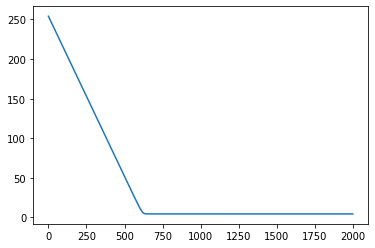

In [53]:
plt.plot(list(range(iteration_num)), losses)

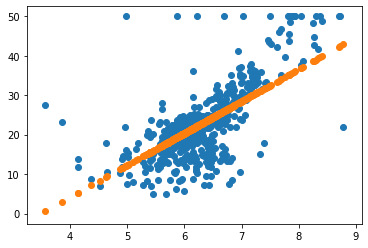

In [54]:

price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)

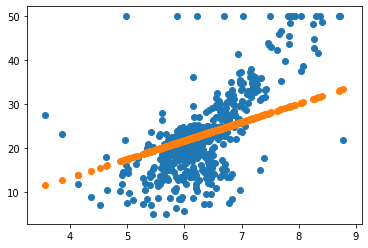

In [25]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm, y)
plt.scatter(X_rm, price_use_current_parameters)

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)